In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
from scipy.stats import chi2_contingency, ttest_ind
# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore") 
# medidas de correlacion
from itertools import combinations


# Ejercicio

# 1. Exploración Inicial:

￿ Realiza una exploración inicial de los datos para identificar posibles problemas,
como valores nulos, atípicos o datos faltantes en las columnas relevantes.

￿ Utiliza funciones de Pandas para obtener información sobre la estructura de los
datos, la presencia de valores nulos y estadísticas básicas de las columnas
involucradas.

￿ Une los dos conjuntos de datos de la forma más eficiente.

In [4]:
# Traemos los csv 

df_flight=pd.read_csv("Customer Flight Activity.csv")

In [7]:
df_flight

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [80]:
df_flight["Loyalty Number"].value_counts()

678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: Loyalty Number, Length: 16737, dtype: int64

In [86]:
df_flight.duplicated().sum()

1864

In [93]:
df_flight=df_flight.drop_duplicates()

In [94]:
df_flight.duplicated().sum()

0

In [5]:
df_loyalty=pd.read_csv("Customer Loyalty History.csv")

In [9]:
df_loyalty

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN


In [6]:
def exploracion_datos(dataframe):
    
    # Extraemos informacion general del dataframe
    print(dataframe.info())

    # DESGLOSAMOS LA INFORMACIÓN

    # Analizamos estructura de los datos
    print("\n ..................... \n")
    print(f"Los datos siguen la siguiente estructura: {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas")

    #Analizamos duplicados
    print("\n ..................... \n")
    print(f"Los duplicados que tenemos en el conjunto de datos son: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    
    # Analizamos los valores nulos
    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    # Analizamos el tipo de datos
    print("\n ..................... \n")
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))

    # Analizamos los principales estadisticos  

    print("Los principales estadisticos de las columnas numéricas son:") 
    display(dataframe.describe()) 
    
    try:
     print("\n ..................... \n")
     print("Los principales estadisticos de las columnas categóricas son:")
     display(dataframe.describe(include = "O"))
    
    except: 
     print("No hay columnas categóricas en el conjunto de datos")


In [111]:
exploracion_datos(df_flight)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 33.9 MB
None

 ..................... 

Los datos siguen la siguiente estructura: 403760 filas y 10 columnas

 ..................... 

Los 

,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Loyalty Number,int64
Year,int64
Month,int64
Flights Booked,int64
Flights with Companions,int64
Total Flights,int64
Distance,int64
Points Accumulated,float64
Points Redeemed,int64
Dollar Cost Points Redeemed,int64


Los principales estadisticos de las columnas numéricas son:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000
mean,549875.383713,2017.500352,6.501335,4.134050,1.036569,5.170619,1214.460979,124.263761,30.838587,2.495973
std,258961.514684,0.500000,3.451982,5.230064,2.080472,6.526858,1434.098521,146.696179,125.758002,10.172033
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326699.000000,2017.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550598.000000,2018.000000,7.000000,1.000000,0.000000,1.000000,525.000000,53.000000,0.000000,0.000000
75%,772152.000000,2018.000000,10.000000,8.000000,1.000000,10.000000,2342.000000,240.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000



 ..................... 

Los principales estadisticos de las columnas categóricas son:
No hay columnas categóricas en el conjunto de datos


In [8]:
exploracion_datos(df_loyalty)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

,%_nulos
Salary,25.321145
Cancellation Year,87.650117
Cancellation Month,87.650117



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Loyalty Number,int64
Country,object
Province,object
City,object
Postal Code,object
Gender,object
Education,object
Salary,float64
Marital Status,object
Loyalty Card,object


Los principales estadisticos de las columnas numéricas son:


,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000



 ..................... 

Los principales estadisticos de las columnas categóricas son:


,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
count,16737,16737,16737,16737,16737,16737,16737,16737,16737
unique,1,11,29,55,2,5,3,3,2
top,Canada,Ontario,Toronto,V6E 3D9,Female,Bachelor,Married,Star,Standard
freq,16737,5404,3351,911,8410,10475,9735,7637,15766


Union de los dos conjuntos de datos

In [96]:
# En este caso emplearemos un left merge()

df_merge=df_flight.merge(right=df_loyalty, how="left", left_on="Loyalty Number", right_on="Loyalty Number")

In [97]:
df_merge

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
403756,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
403757,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
403758,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN


In [15]:
df_merge_copy=df_merge.copy

In [11]:
# Comprobamos estructura del df_merge

print(f"las filas y columnas que tenemos en el mergeado_izquierda son {df_merge.shape}")

las filas y columnas que tenemos en el mergeado_izquierda son (405624, 25)


In [98]:
# EDA del nuevo dataframe mergeado

exploracion_datos(df_merge)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 

,%_nulos
Salary,25.326927
Cancellation Year,87.703091
Cancellation Month,87.703091



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Loyalty Number,int64
Year,int64
Month,int64
Flights Booked,int64
Flights with Companions,int64
Total Flights,int64
Distance,int64
Points Accumulated,float64
Points Redeemed,int64
Dollar Cost Points Redeemed,int64


Los principales estadisticos de las columnas numéricas son:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,403760.000000,301500.000000,403760.000000,403760.000000,403760.000000,49650.000000,49650.000000
mean,549875.383713,2017.500352,6.501335,4.134050,1.036569,5.170619,1214.460979,124.263761,30.838587,2.495973,79258.576285,7990.864857,2015.250716,6.667555,2016.504350,6.962095
std,258961.514684,0.500000,3.451982,5.230064,2.080472,6.526858,1434.098521,146.696179,125.758002,10.172033,34983.929798,6863.317160,1.979427,3.398829,1.380482,3.454362
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326699.000000,2017.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59262.000000,3981.780000,2014.000000,4.000000,2016.000000,4.000000
50%,550598.000000,2018.000000,7.000000,1.000000,0.000000,1.000000,525.000000,53.000000,0.000000,0.000000,73479.000000,5776.340000,2015.000000,7.000000,2017.000000,7.000000
75%,772152.000000,2018.000000,10.000000,8.000000,1.000000,10.000000,2342.000000,240.000000,0.000000,0.000000,88606.000000,8937.120000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000



 ..................... 

Los principales estadisticos de las columnas categóricas son:


,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
count,403760,403760,403760,403760,403760,403760,403760,403760,403760
unique,1,11,29,55,2,5,3,3,2
top,Canada,Ontario,Toronto,V6E 3D9,Female,Bachelor,Married,Star,Standard
freq,403760,130258,80775,21944,202757,252567,234845,183745,380419


In [125]:
df_merge.duplicated(subset="loyalty_number").sum()

387023

# 2. Limpieza de Datos:

- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar
  que los datos estén completos.

- Verifica la consistencia y corrección de los datos para asegurarte de que los
  datos se presenten de forma coherente.

- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo,
  cambiar tipos de datos) para garantizar la adecuación de los datos para el
  análisis estadístico.

In [99]:
# Extraemos de nuevo la lista de columnas que tienen nulos y sus porcentajes

df_nulos = pd.DataFrame(df_merge.isnull().sum() / df_merge.shape[0] * 100, columns = ["%_nulos"])
display(df_nulos[df_nulos["%_nulos"] > 0])

,%_nulos
Salary,25.326927
Cancellation Year,87.703091
Cancellation Month,87.703091


Gestión de los nulos

- Hay que analizar las características de las columnas que contienen nulos para saber cómo trabajar esos valores. Hay dos factores fundamentales cantidad de nulos y si existen valores atípicos en el conjunto de valores.
- Hay dos maneras principalmente de gestionar los nulos ---> eliminación de columnas o aplicar métodos de imputación

- Cuando hay una cantidad superior al 5-10% (según el contexto de los datos) de valores faltantes, lo más adecuado es utilizar métodos como KNNImputer o IterativeImputer. Salvo que se considere que se puede proceder a la eliminación de la columna cuando ese porcentaje sea excesivamente elevado

In [ ]:
# En este caso, las 3 columnas con valores nulos, los tienen en una proporción superior al 10%. 
# Sin embargo Cancellation Year y Cancellation Month tienen una proporción de nulos muy elevado y, dado que en el análisis del ejercicio no van a ser columnas relevantes, podremos eliminarlas.
# La coumna Salary, es una columna relevante para el análisis y tiene un porcentaje de nulos que no es excesivamente grande por lo que podremos gestionar estos nulos con los metodos de imputacion correspondientes

In [100]:
# CREO EL MÉTODO:

imputer_iterative = IterativeImputer(max_iter = 10, random_state = 42)

# Transformamos los datos
salarios_imputados=imputer_iterative.fit_transform(df_merge[["Salary"]])

In [15]:
salarios_imputados

array([[92552.        ],
       [79268.82595263],
       [79268.82595263],
       ...,
       [47670.        ],
       [79268.82595263],
       [46594.        ]])

In [101]:
df_merge["Salary"]=salarios_imputados.round(2)

In [102]:
# Compruebo como ha quedado la columna en el dataframe
df_merge

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.00,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79258.58,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,79258.58,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.00,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.00,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79258.58,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
403756,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.00,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
403757,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.00,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
403758,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,79258.58,Married,Star,2631.56,Standard,2018,7,NaN,NaN


In [103]:
# ELIMINO COLUMNAS: Cancellation Year y Cancellation Month:

df_merge=df_merge.drop(columns=["Cancellation Year", "Cancellation Month"])

In [19]:
df_merge

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.00,Married,Aurora,7919.20,Standard,2016,8
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79268.83,Single,Nova,2887.74,Standard,2013,3
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,79268.83,Divorced,Nova,2838.07,Standard,2016,7
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.00,Married,Star,4170.57,Standard,2015,8
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.00,Divorced,Star,6622.05,Standard,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79268.83,Married,Aurora,7290.07,Standard,2014,5
405620,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.00,Single,Nova,8564.77,Standard,2012,8
405621,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.00,Married,Nova,20266.50,Standard,2017,7
405622,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,79268.83,Married,Star,2631.56,Standard,2018,7


Limpieza de datos

In [23]:
# Comrpuebo nombre de columnas para evaluar la necesidad de estadarizarlos: eliminar espacios al principio y al final, sustituir espacios por "_", reemplazar mayusculas o minusculas...

lista_columnas=df_merge.columns

In [24]:
lista_columnas

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month'],
      dtype='object')

- Columnas

In [104]:
df_merge.columns=df_merge.columns.str.replace(" ", "_")

In [105]:
df_merge.columns=df_merge.columns.str.lower()

In [106]:
df_merge.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month'],
      dtype='object')

- Mejora de valores para columna "month"

In [107]:
# Los valores de la columna "month" podrían cambiarse por el nombre de los meses del año correspondiente y , por tanto, cambiar el tipo de dato object 

dicc_meses={1:"enero", 2:"febrero", 3:"marzo", 4:"abril", 5:"mayo", 6:"junio", 7:"julio", 8:"agosto", 9:"septiembre", 10:"octubre", 11:"noviembre", 12:"diciembre"}

df_merge["month"]=df_merge["month"].replace(dicc_meses)

In [108]:
df_merge["month"].astype("object")

0             enero
1             enero
2             enero
3             enero
4             enero
            ...    
403755    diciembre
403756    diciembre
403757    diciembre
403758    diciembre
403759    diciembre
Name: month, Length: 403760, dtype: object

In [109]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 403759
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               403760 non-null  int64  
 1   year                         403760 non-null  int64  
 2   month                        403760 non-null  object 
 3   flights_booked               403760 non-null  int64  
 4   flights_with_companions      403760 non-null  int64  
 5   total_flights                403760 non-null  int64  
 6   distance                     403760 non-null  int64  
 7   points_accumulated           403760 non-null  float64
 8   points_redeemed              403760 non-null  int64  
 9   dollar_cost_points_redeemed  403760 non-null  int64  
 10  country                      403760 non-null  object 
 11  province                     403760 non-null  object 
 12  city                         403760 non-null  object 
 13 

- Elimino valores negativos

In [163]:
# Tras el análisis de los datos, el método describe() ha arrojado para a columna "salary" valores negativos, por lo que habrá que limpiarlos

df_negativ=df_merge[df_merge["salary"]<0]

In [167]:
df_negativ

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
291,115505,2017,enero,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4
956,152016,2017,enero,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2
1716,194065,2017,enero,0,0,0,0,0.0,0,0,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2
2081,212128,2017,enero,3,0,3,1959,195.0,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,-49001.0,Married,Nova,3130.68,2018 Promotion,2018,2
2433,232755,2017,enero,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398813,734647,2018,diciembre,15,0,15,1440,144.0,0,0,Canada,Saskatchewan,Regina,S1J 3C5,Male,Bachelor,-46303.0,Married,Nova,11280.73,2018 Promotion,2018,4
399884,790475,2018,diciembre,7,1,8,1056,105.0,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,-34079.0,Married,Nova,12913.50,2018 Promotion,2018,2
402017,906428,2018,diciembre,13,0,13,2912,291.0,0,0,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4
402459,430398,2018,diciembre,5,5,10,660,66.0,539,44,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3


In [166]:
df_negativ.shape  # averiguo cuántos valores en la columna hay negativos

(480, 23)

In [171]:
# Para convertir valores negativos a positivos en una columna existe el método .abs()

df_merge["salary"]=df_merge["salary"].abs()

In [172]:
df_negativ=df_merge[df_merge["salary"]<0]

In [173]:
df_negativ

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month


# Fase 2: Visualización


**3. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?**

In [110]:
df_merge

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
0,100018,2017,enero,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.00,Married,Aurora,7919.20,Standard,2016,8
1,100102,2017,enero,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79258.58,Single,Nova,2887.74,Standard,2013,3
2,100140,2017,enero,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,79258.58,Divorced,Nova,2838.07,Standard,2016,7
3,100214,2017,enero,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.00,Married,Star,4170.57,Standard,2015,8
4,100272,2017,enero,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.00,Divorced,Star,6622.05,Standard,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,diciembre,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,79258.58,Married,Aurora,7290.07,Standard,2014,5
403756,999911,2018,diciembre,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.00,Single,Nova,8564.77,Standard,2012,8
403757,999940,2018,diciembre,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.00,Married,Nova,20266.50,Standard,2017,7
403758,999982,2018,diciembre,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,79258.58,Married,Star,2631.56,Standard,2018,7


In [70]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405624 entries, 0 to 405623
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               405624 non-null  int64  
 1   year                         405624 non-null  int64  
 2   month                        405624 non-null  object 
 3   flights_booked               405624 non-null  int64  
 4   flights_with_companions      405624 non-null  int64  
 5   total_flights                405624 non-null  int64  
 6   distance                     405624 non-null  int64  
 7   points_accumulated           405624 non-null  float64
 8   points_redeemed              405624 non-null  int64  
 9   dollar_cost_points_redeemed  405624 non-null  int64  
 10  country                      405624 non-null  object 
 11  province                     405624 non-null  object 
 12  city                         405624 non-null  object 
 13 

In [ ]:
# Las columnas que en este caso nos interesa analizar serán "flights_booked" y "month"

Gráfico Barplot

In [ ]:
# Este tipo de gráficas se usa para mostrar la distribución, comparación y relaciones entre diferentes categorías

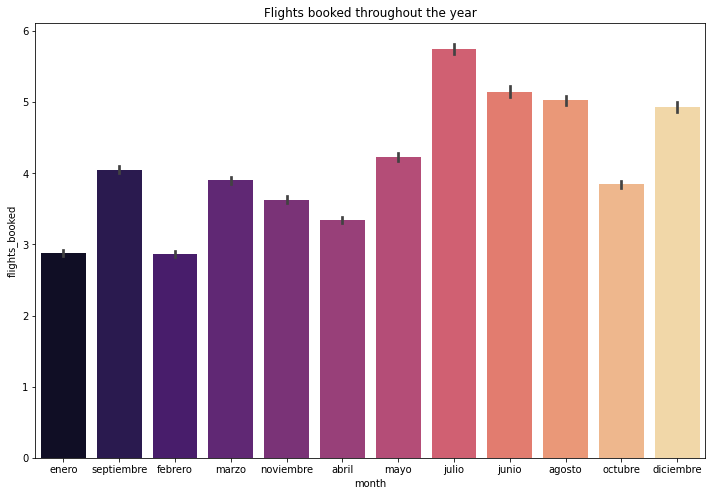

In [140]:
# Método gráfico barplot():

plt.figure(figsize=(12, 8)) # personalizo tamaño del gráfico

sns.barplot(x = "month", 
            y = "flights_booked", 
            data = df_merge,  
            palette = "magma")

plt.title("Flights booked throughout the year", fontsize = 12);

**4. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los
clientes?**

In [ ]:
# Variables a analizar : "distance" y "points_accumulated"

Gráfico de dispersión

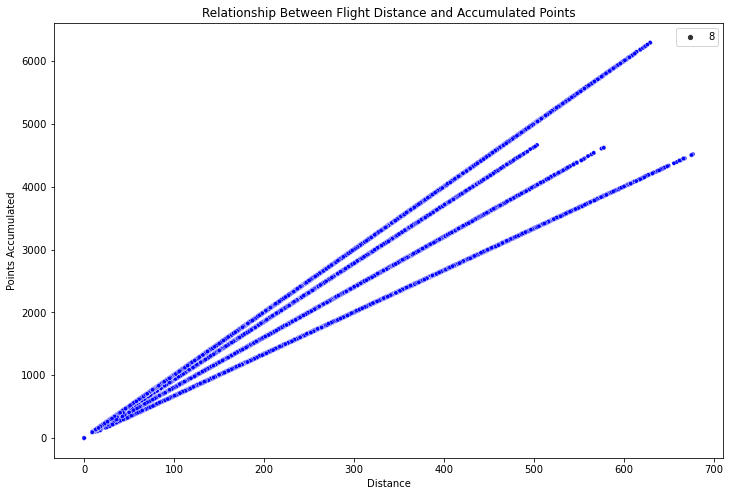

In [141]:
plt.figure(figsize=(12, 8)) # personalizo tamaño del gráfico

sns.scatterplot(x = "points_accumulated", 
                y = "distance", 
                data = df_merge, 
                size = 8, 
                color = "blue")


# cambiamos los nombres de los ejes
plt.xlabel("Distance")
plt.ylabel("Points Accumulated")
plt.title("Relationship Between Flight Distance and Accumulated Points", fontsize = 12);

Análisis del Gráfico:

In [ ]:
# La tendencia ascendente de los puntos en el gráfico indican que hay una correlación positiva entre la distancia de los vuelos y los puntos acumulados.

**5. ¿Cuál es la distribución de los clientes por provincia o estado?**

In [115]:
# hay que tener en cuenta a la hora de interpretar los datos que en el conjunto de datos hay valores de columna loyalty number repetidos

df_merge["loyalty_number"].value_counts()

974875    48
736504    48
890702    48
617489    48
200519    47
          ..
428402    24
428452    24
428520    24
428523    24
999891    24
Name: loyalty_number, Length: 16737, dtype: int64

Pieplot

In [151]:
# En este caso, habrá que agrupar los datos por provincia o estado y para ello se usará un groupby de las columna "province". Para representar la distribucion de valores dentro de una categoria se usará un Pieplot

distribucion_provincia=df_merge.groupby("province")["loyalty_number"].count().reset_index()

In [132]:
distribucion_provincia

,province,loyalty_number
0,Alberta,23360
1,British Columbia,106442
2,Manitoba,15900
3,New Brunswick,15352
4,Newfoundland,6244
5,Nova Scotia,12507
6,Ontario,130258
7,Prince Edward Island,1584
8,Quebec,79573
9,Saskatchewan,9861


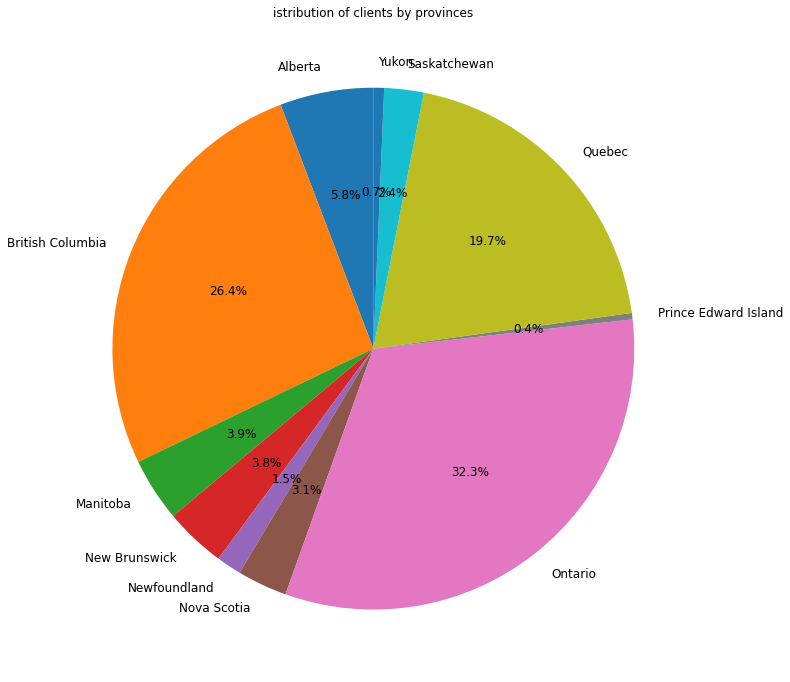

In [144]:
plt.figure(figsize=(15, 12)) # personalizo tamaño del gráfico

plt.pie("loyalty_number", labels= "province",
        data = distribucion_provincia, 
        autopct=  '%1.1f%%',  
        textprops={'fontsize': 12}, 
        startangle=90);

plt.title("distribution of clients by provinces", fontsize = 12);

**6. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los
clientes?**

In [149]:
# Se crea un gráfico de estilo Barplot para estudiar la relacion entre variable categórica y variable numérica. En el caso de usar la libreria Matplotlib hay que calcular el groupby() siguiente:

salario_educacion=df_merge.groupby("education")["salary"].mean().round(2).reset_index()

In [150]:
salario_educacion

,education,salary
0,Bachelor,72473.47
1,College,79258.58
2,Doctor,178403.68
3,High School or Below,61019.93
4,Master,103734.52


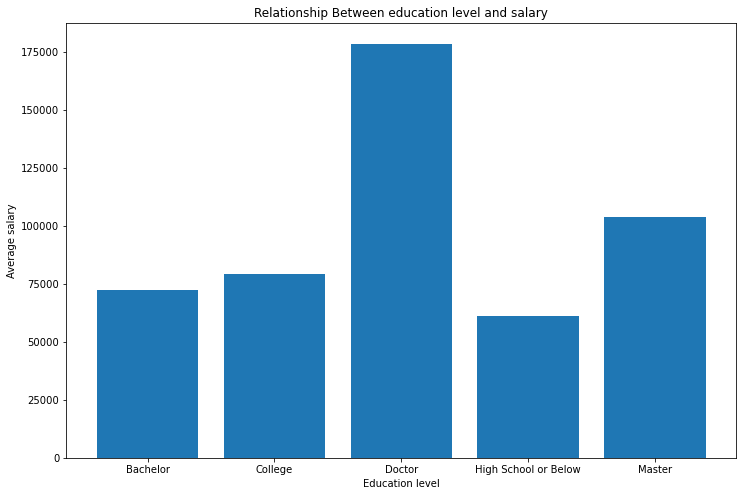

In [176]:
plt.figure(figsize=(12, 8)) # personalizo tamaño del gráfico

plt.bar(x = "education", 
        height=  "salary", 
        data = salario_educacion);

# cambiamos los nombres de los ejes
plt.xlabel("Education level")
plt.ylabel("Average salary")
plt.title("Relationship Between education level and salary", fontsize = 12);

Análisis del gráfico: el gráfico arroja como resultado que los clientes pertenecientes al nivel educativo con doctorado, tienen un mayor salario promedio con respecto a los demás

**7. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?**

In [158]:
# La proporcion de clientes en relacion al tipo de tarjeta se representará con un gráfico tipo Pieplot

clientes_tarjetas=df_merge.groupby("loyalty_card")["loyalty_number"].count().reset_index()

In [159]:
clientes_tarjetas

,loyalty_card,loyalty_number
0,Aurora,83132
1,Nova,136883
2,Star,183745


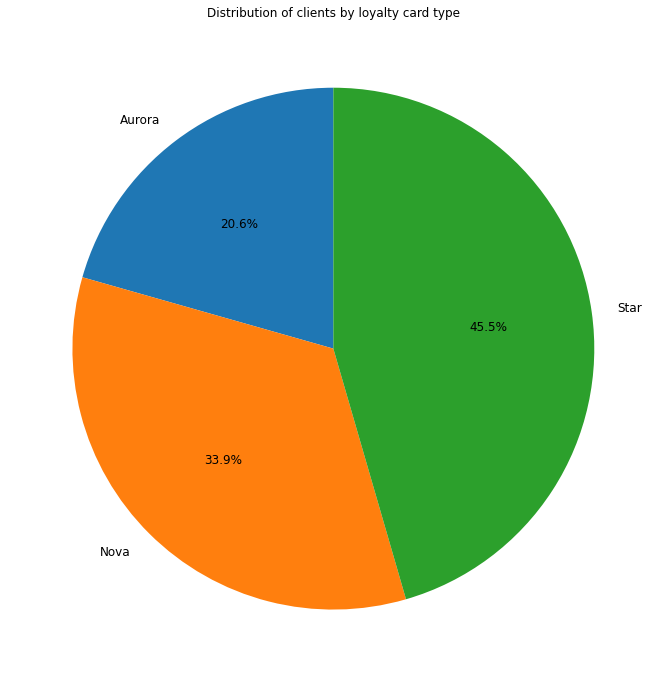

In [160]:
plt.figure(figsize=(15, 12)) # personalizo tamaño del gráfico

plt.pie("loyalty_number", labels= "loyalty_card",
        data = clientes_tarjetas, 
        autopct=  '%1.1f%%', # para que muestre el simbolo % 
        textprops={'fontsize': 12}, 
        startangle=90);

plt.title("Distribution of clients by loyalty card type", fontsize = 12);

**8. ¿Cómo se distribuyen los clientes según su estado civil y género?**

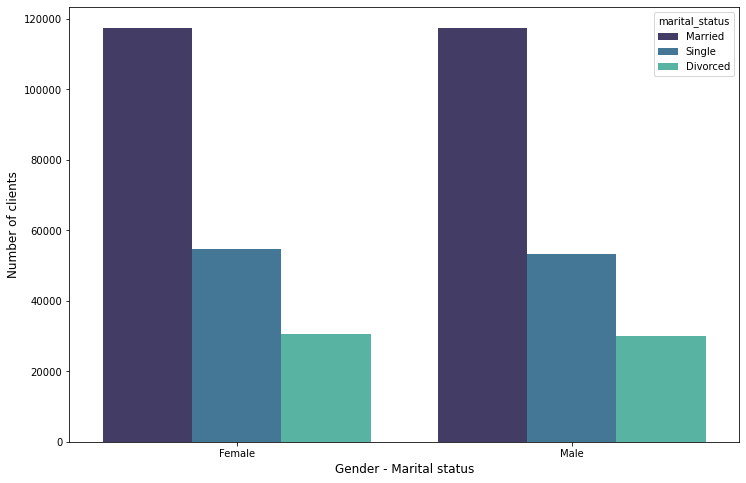

In [138]:
plt.figure(figsize=(12, 8)) 

sns.countplot(x = "gender", 
              data = df_merge, 
              palette = "mako", 
              hue = "marital_status") 


plt.xlabel("Gender - Marital status", fontsize = 12)
plt.ylabel("Number of clients",  fontsize = 12); 

Analisis del gráfico: se distribuyen de manera bastante similar entre hombres y mujeres y el estado civil dentro de caada grupo

# Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo
Objetivo del Ejercicio:
Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias
significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para
ello, los pasos que deberas seguir son:

9. Preparación de Datos:

- Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
'Flights Booked' y 'Education'.

In [174]:
df_fase3 = df_merge[['flights_booked', 'education']]

In [175]:
df_fase3

,flights_booked,education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor
...,...,...
403755,0,College
403756,0,Doctor
403757,3,Bachelor
403758,0,College


## 10. Análisis Descriptivo:

- Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas
(como el promedio, la desviación estandar, los percentiles) del número de vuelos
reservados para cada grupo.

In [180]:
df_fase3.groupby("education")["flights_booked"].agg(["mean", "median", "max", "min", "var", "std"])

,mean,median,max,min,var,std
education,,,,,,
Bachelor,4.110288,1.0,21,0,27.265843,5.221671
College,4.169744,1.0,21,0,27.520938,5.246040
Doctor,4.175512,1.0,21,0,27.635748,5.256971
High School or Below,4.176209,1.0,21,0,27.449915,5.239267
Master,4.200700,1.0,21,0,27.185339,5.213956


Conclusiones:

- De acuerdo a la  media, el número de vuelos reservados no varía significativamente entre los diferentes niveles educativos.

- Los datos de la mediana nos indican que el 50% de los clientes han reservado entre 0 y 1 vuelo

- La varianza y la desviación estandar nos muestran que existen una considerable dispersion de los datos con respescto a la media, hecho coherente con los datos de maximo y minimo tambien extraidos en la tabla de estadisticas descriptivas

In [184]:
# Frecuencias de las categorias de "education" 

frecuencia_absoluta=df_fase3["education"].value_counts() 

frecuencia_relativa=df_fase3["education"].value_counts(normalize=True)*100 

# Creo un DataFrame para mostrar las frecuencias
tabla_frecuencias = pd.DataFrame({
    'education': frecuencia_absoluta.index,
    'Frecuencia Absoluta': frecuencia_absoluta.values,
    'Frecuencia Relativa (%)': frecuencia_relativa.values})

In [185]:
tabla_frecuencias

,education,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Bachelor,252567,62.553745
1,College,102260,25.326927
2,High School or Below,18915,4.684714
3,Doctor,17731,4.391470
4,Master,12287,3.043144


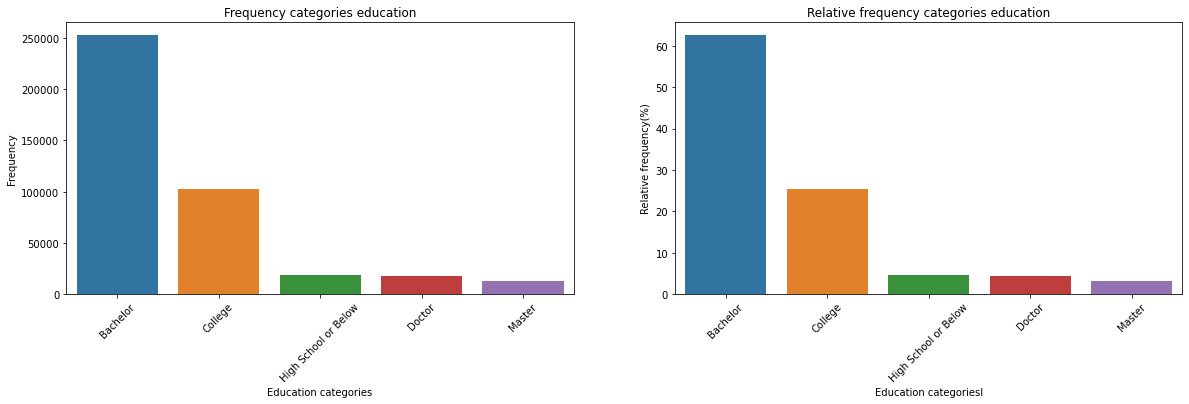

In [186]:
# Crear un subplot con 2 filas y 1 columna
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Gráfico de barras para la frecuencia absoluta
sns.barplot(x='education', y='Frecuencia Absoluta', data=tabla_frecuencias, ax=axes[0])
axes[0].set_title('Frequency categories education')
axes[0].set_xlabel('Education categories')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de barras para la frecuencia relativa
sns.barplot(x='education', y='Frecuencia Relativa (%)', data=tabla_frecuencias, ax=axes[1])
axes[1].set_title('Relative frequency categories education')
axes[1].set_xlabel('Education categoriesl')
axes[1].set_ylabel('Relative frequency(%)')
axes[1].tick_params(axis='x', rotation=45)

In [ ]:
# Percentiles:


# 11. Prueba Estadística:


Realiza una prueba de A/B testing para determinar si existe una diferencia
significativa en el número de vuelos reservados entre los diferentes niveles
educativos.

- Hipótesis Nula (H0): No hay diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

- Hipótesis Alternativa (H1): Hay una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [ ]:
# PASO 1: 
# Preparar los datos, crear un datafrma con las columnas que nos interesa comparar y definir las hipótesis ✅ 

Nomalidad

In [220]:
# Se procede a evaluar la normalidad de la columna de datos "flights_booked" del dataframe utilizando la prueba de Shapiro-Wilk.

def normalidad(dataframe, columna):

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")


In [221]:
normalidad(df_fase3, "flights_booked" )

Para la columna flights_booked los datos no siguen una distribución normal.


Homogeneidad

In [227]:
def homogeneidad (dataframe, columna, columna_metrica):
  
    
    # Se crea una lista de las categorias dentro de la columna "education"
    valores_evaluar = []
    
    for valor in dataframe[columna].unique():
        valores_evaluar.append(dataframe[dataframe[columna]== valor][columna_metrica])

    statistic, p_value = stats.levene(*valores_evaluar)
    if p_value > 0.05:
        print(f"Para la métrica {columna_metrica} las varianzas son homogéneas entre grupos.")
    else:
        print(f"Para la métrica {columna_metrica}, las varianzas no son homogéneas entre grupos.")

In [228]:
homogeneidad(df_fase3, "education", "flights_booked")

Para la métrica flights_booked, las varianzas no son homogéneas entre grupos.


- No puedo usar metodo no paramétrico de Mann Whitney, porque sirve para comparar dos grupos. En este caso, estamos comparando más de dos.

 - Kruskal es una prueba no parametrica para comparar más de 2 grupos, es el equivalente a la prueba ANOVA

In [233]:
from scipy.stats import kruskal

!pip install scikit-posthocs
from scikit_posthocs import posthoc_dunn

     |████████████████████████████████| 38.6 MB 259 kB/s eta 0:00:01     |█████████████████████████▋      | 30.9 MB 346 kB/s eta 0:00:23
     |████████████████████████████████| 18.2 MB 471 kB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.1
    Uninstalling scipy-1.7.1:
      Successfully uninstalled scipy-1.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.26.4 which is incompatible.


In [ ]:
# Agrupar los datos por nivel educativo

bachelor = df_fase3[df_fase3['education'] == 'Bachelor']['flights_booked']
college = df_fase3[df_fase3['education'] == 'College']['flights_booked']
doctor = df_fase3[df_fase3['education'] == 'Doctor']['flights_booked']
high_school = df_fase3[df_fase3['education'] == 'High School or Below']['flights_booked']
master = df_fase3[df_fase3['education'] == 'Master']['flights_booked']

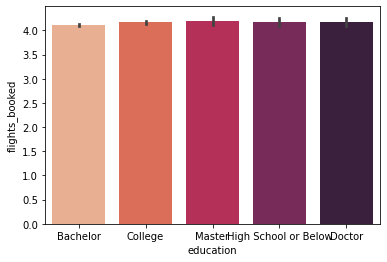

In [230]:
# Creo gráfica para visualizar los datos agrupados en la celda anterior

sns.barplot(x="education", y="flights_booked", data=df_fase3,  palette = "rocket_r"); 

In [236]:
stat, p_value = kruskal(bachelor, college, doctor, high_school, master)


print(f'Kruskal-Wallis Test Statistic: {stat}')
print(f'P-Value: {p_value}') 

# Interpretar los resultados
if p_value < 0.05:
    print("Existen diferencias significativas entre los grupos.")

    # Prueba post-hoc Dunn's Test: este test identifica qué grupos específicos son significativamente diferentes entre sí.
    posthoc = posthoc_dunn(df_fase3, val_col='flights_booked', group_col='education', p_adjust='bonferroni') # este ultimo metodo ajusta los p_values
    print(posthoc)
else:
    print("No existen diferencias significativas entre los grupos.")

Kruskal-Wallis Test Statistic: 17.532618623121756
P-Value: 0.0015225470219889367
Existen diferencias significativas entre los grupos.
                      Bachelor   College    Doctor  High School or Below  \
Bachelor              1.000000  0.022735  0.949079              0.362961   
College               0.022735  1.000000  1.000000              1.000000   
Doctor                0.949079  1.000000  1.000000              1.000000   
High School or Below  0.362961  1.000000  1.000000              1.000000   
Master                0.142438  1.000000  1.000000              1.000000   

                        Master  
Bachelor              0.142438  
College               1.000000  
Doctor                1.000000  
High School or Below  1.000000  
Master                1.000000  


**CONCLUSÓN**: Hay una diferencia significativa entre el numero de vuelos reservados tan solo para los niveles educativos de "bachelor" y "college". No obstante, la relación del numero de vuelos reservados entre los demás niveles educativos no es significativa, por lo que para todos estos casos la hipótesis nula seria cierta.